In [73]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## importing the dataset
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
## dependent and Independent Features
x = df.iloc[:,3:13]
y = df.iloc[:,13]

In [5]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [6]:
## create dummy variables
geography = pd.get_dummies(x['Geography'],drop_first=True)
gender = pd.get_dummies(x['Gender'],drop_first=True)

In [7]:
## concatenating the data frames
x = pd.concat([x,geography,gender],axis=1)

In [8]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [9]:
## dropping the unnecessary coulmns
x = x.drop(['Geography','Gender'],axis=1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [10]:
## spiliting the dataset into train and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [20]:
X_train.shape

(8000, 11)

In [21]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [22]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [23]:
## make an ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense,Flatten,Dropout
from tensorflow.keras.layers import Activation


In [61]:
## Initializing the ANN model
model = Sequential()
## adding the Input layer and first Hidden Layer
model.add(Dense(units = 10,kernel_initializer='he_normal',activation='relu',input_dim=11))
model.add(Dropout(0.3))
## adding the second hidden layer
model.add(Dense(units=20,kernel_initializer='he_normal',activation='relu'))
model.add(Dropout(0.4))
## adding the third hidden layer
model.add(Dense(units=30,kernel_initializer='he_normal',activation='relu'))
model.add(Dropout(0.4))
## adding the output layer
model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

model

In [62]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 10)                120       
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 20)                220       
_________________________________________________________________
dropout_4 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 30)                630       
_________________________________________________________________
dropout_5 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)               

In [63]:
## compiling the ANN
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [64]:
model_histroy = model.fit(X_train,y_train,batch_size=10,validation_data=X_test,validation_split=0.33,epochs=100)

Epoch 1/100
536/536 [==============================] - 2s 3ms/step - loss: 0.6811 - accuracy: 0.7442 - val_loss: 0.5172 - val_accuracy: 0.7952
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5533 - accuracy: 0.7807 - val_loss: 0.5097 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5265 - accuracy: 0.7916 - val_loss: 0.5044 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5058 - accuracy: 0.7940 - val_loss: 0.4858 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4963 - accuracy: 0.7964 - val_loss: 0.4813 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4892 - accuracy: 0.7960 - val_loss: 0.4713 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4825 - accuracy: 0.7960 - val_loss: 0.4677 - val_accuracy: 0.7955

Epoch 58/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3857 - accuracy: 0.8371 - val_loss: 0.3790 - val_accuracy: 0.8379
Epoch 59/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3809 - accuracy: 0.8406 - val_loss: 0.3843 - val_accuracy: 0.8485
Epoch 60/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3957 - accuracy: 0.8345 - val_loss: 0.3804 - val_accuracy: 0.8425
Epoch 61/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3814 - accuracy: 0.8371 - val_loss: 0.3799 - val_accuracy: 0.8444
Epoch 62/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3790 - accuracy: 0.8444 - val_loss: 0.3772 - val_accuracy: 0.8519
Epoch 63/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3782 - accuracy: 0.8390 - val_loss: 0.3781 - val_accuracy: 0.8531
Epoch 64/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3904 - accuracy: 0.8362 - val_loss: 0.3819 - val_accuracy:

In [65]:
### predicting the test data
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [66]:
## making the confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cnn = confusion_matrix(y_pred,y_test)
cnn

array([[1561,  253],
       [  34,  152]], dtype=int64)

In [67]:
### Accuracy score for the test data
acu = accuracy_score(y_pred,y_test)
acu

0.8565

In [72]:
### list all the data in history
print(model_histroy.history.keys())



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0, 0.5, 'Accuracy')

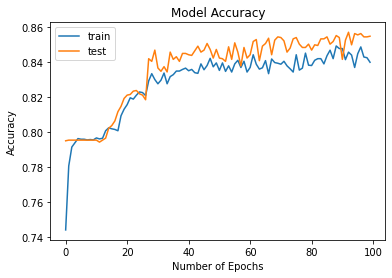

In [79]:
## summerize history for accuracy
plt.plot(model_histroy.history['accuracy'])
plt.plot(model_histroy.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['train','test'])
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

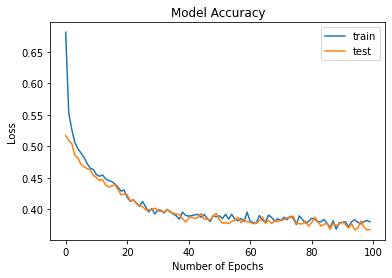

In [82]:
## summerize histroy for Loss
plt.plot(model_histroy.history['loss'])
plt.plot(model_histroy.history['val_loss'])
plt.title('Model Accuracy')
plt.legend(['train','test'])
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')